### E-commerce Fraud Detection Model Using Machine Learning
#### By : Shivam Singh

In [1]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import data visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Neccessory Libraries
# 1 . Importing filter warning libraries
import warnings
warnings.filterwarnings(action= 'ignore')

# 2. Importing Data logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename= 'model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    force = True)
#3. Import OrderDict()
from collections import OrderedDict

In [2]:
df = pd.read_csv(r'C:\15Days15Project\Ecommerce-Fraud-Detection-Model\data\raw\transactions.csv')

df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [3]:
# Descriptive stats

def descriptive_stats():
    numerical_col = df.select_dtypes(exclude = 'object').columns
    categorica_col = df.select_dtypes(include = 'object').columns
    num_stats = []
    cat_stats = []
    data_info = []

    for i in numerical_col:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1 
        LF = Q1 - 1.5*IQR
        UF = Q3 + 1.5*IQR

        outlier_count = len(df[(df[i] < LF) | (df[i] > UF)])
        outlier_percentage = outlier_count / len(df[i]) * 100

        numerical_stats = OrderedDict({
            "Feature " : i ,
            "Q1" : Q1,
            "Q3" : Q3,
            "IQR" : IQR,
            "LF" : LF,
            "UF" : UF,
            "Mean" : df[i].mean(),
            "Median" : df[i].median(),
            "Min" : df[i].min(),
            "Max" : df[i].max(),
            "Outlier count" : outlier_count,
            "outlier percentage" : outlier_percentage,
            "standard derivation": df[i].std(),
            "variance" : df[i].var(),
            "skewness" : df[i].skew(),
            "kurtosis" : df[i].kurtosis()
        })
        num_stats.append(numerical_stats)
    numerical_stats_report = pd.DataFrame(num_stats)

    for i in categorica_col:
        categorical_stats = OrderedDict({
            "Feature" : i , 
            "Unquie count" : df[i].nunique(),
            "Value count" : df[i].value_counts(),
            "mode" : df[i].mode()
        })
        cat_stats.append(categorical_stats)
    categorical_stats_report = pd.DataFrame(cat_stats)


    for i in df.columns : 
        data1 = OrderedDict({
            "Feature" : i ,
            "Missing value" : df[i].isnull().sum(),
            "Unqiue value" : df[i].nunique(),
            "value count " : df[i].value_counts().to_dict()
        })
        data_info.append(data1)
    data_info_report = pd.DataFrame(data_info)

    return categorical_stats_report,numerical_stats_report,data_info_report

categorical_stats_report,numerical_stats_report,data_info_report = descriptive_stats()

In [4]:
# Numerical stats
numerical_stats_report

,Feature,Q1,Q3,IQR,LF,UF,Mean,Median,Min,Max,Outlier count,outlier percentage,standard derivation,variance,skewness,kurtosis
0,transaction_id,74924.50,224771.50,149847.00,-149846.000,449542.000,149848.000000,149848.00,1.00,299695.00,0,0.000000,86514.638800,7.484783e+09,0.000000,-1.200000
1,user_id,1501.00,4504.00,3003.00,-3003.500,9008.500,3002.559432,3007.00,1.00,6000.00,0,0.000000,1732.309663,3.000897e+06,-0.001679,-1.201662
2,account_age_days,516.00,1425.00,909.00,-847.500,2788.500,973.397871,975.00,1.00,1890.00,0,0.000000,525.241409,2.758785e+05,-0.022311,-1.178665
3,total_transactions_user,46.00,56.00,10.00,31.000,71.000,50.673321,51.00,40.00,60.00,0,0.000000,5.976391,3.571725e+01,-0.127329,-1.166513
4,avg_amount_user,46.19,173.45,127.26,-144.700,364.340,148.142973,90.13,3.52,4565.29,23890,7.971438,200.364624,4.014598e+04,6.486788,86.891549
5,amount,42.10,191.11,149.01,-181.415,414.625,177.165279,89.99,1.00,16994.74,26711,8.912728,306.926507,9.420388e+04,8.298999,178.119749
6,promo_used,0.00,0.00,0.00,0.000,0.000,0.153640,0.00,0.00,1.00,46045,15.363953,0.360603,1.300349e-01,1.921017,1.690319
7,avs_match,1.00,1.00,0.00,1.000,1.000,0.837999,1.00,0.00,1.00,48551,16.200137,0.368453,1.357574e-01,-1.834704,1.366150
8,cvv_result,1.00,1.00,0.00,1.000,1.000,0.872110,1.00,0.00,1.00,38328,12.789002,0.333968,1.115345e-01,-2.228433,2.965932
9,three_ds_flag,1.00,1.00,0.00,1.000,1.000,0.784588,1.00,0.00,1.00,64558,21.541234,0.411109,1.690104e-01,-1.384498,-0.083167


In [5]:
# Categorical stats
categorical_stats_report

,Feature,Unquie count,Value count,mode
0,country,10,country US 32430 GB 30602 FR 30343 NL...,"0 US Name: country, dtype: object"
1,bin_country,10,bin_country US 32295 GB 30563 FR 3026...,"0 US Name: bin_country, dtype: object"
2,channel,2,channel web 152226 app 147469 Name: coun...,"0 web Name: channel, dtype: object"
3,merchant_category,5,merchant_category electronics 60220 travel ...,"0 electronics Name: merchant_category, dtyp..."
4,transaction_time,297975,transaction_time 2024-10-17T01:27:59Z 3 202...,0 2024-02-19T04:40:37Z 1 2024-02-22T00:2...


In [6]:
# data info 
data_info_report

,Feature,Missing value,Unqiue value,value count
0,transaction_id,0,299695,"{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: ..."
1,user_id,0,6000,"{1409: 60, 5966: 60, 33: 60, 1370: 60, 36: 60,..."
2,account_age_days,0,1801,"{695: 677, 910: 551, 1532: 518, 1297: 502, 133..."
3,total_transactions_user,0,21,"{60: 16680, 55: 16665, 59: 16520, 58: 16472, 5..."
4,avg_amount_user,0,5347,"{33.17: 233, 49.21: 198, 20.52: 195, 30.2: 190..."
5,amount,0,60043,"{5.0: 1527, 16.08: 39, 29.79: 37, 21.3: 36, 22..."
6,country,0,10,"{'US': 32430, 'GB': 30602, 'FR': 30343, 'NL': ..."
7,bin_country,0,10,"{'US': 32295, 'GB': 30563, 'FR': 30261, 'NL': ..."
8,channel,0,2,"{'web': 152226, 'app': 147469}"
9,merchant_category,0,5,"{'electronics': 60220, 'travel': 59922, 'groce..."


<Axes: >

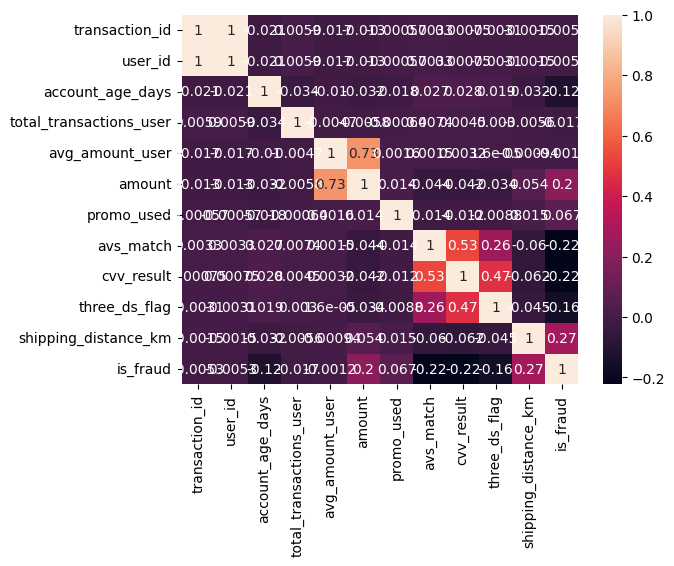

In [7]:
sns.heatmap(df.corr(numeric_only = True), annot = True )

In [8]:
df.columns

Index(['transaction_id', 'user_id', 'account_age_days',
       'total_transactions_user', 'avg_amount_user', 'amount', 'country',
       'bin_country', 'channel', 'merchant_category', 'promo_used',
       'avs_match', 'cvv_result', 'three_ds_flag', 'transaction_time',
       'shipping_distance_km', 'is_fraud'],
      dtype='object')

In [ ]:
plt.figure()
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='count'>

In [ ]:
plt.figure()
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.title("Transaction Amount vs Fraud")
plt.show()

In [ ]:
plt.figure()
sns.boxplot(x='is_fraud', y='account_age_days', data=df)
plt.title("Account Age vs Fraud")
plt.show()

In [ ]:
plt.figure()
sns.boxplot(x='is_fraud', y='total_transactions_user', data=df)
plt.title("User Transaction Count vs Fraud")
plt.show()

In [ ]:
plt.figure()
sns.countplot(x='promo_used', hue='is_fraud', data=df)
plt.title("Promo Code Usage vs Fraud")
plt.show()

In [ ]:
plt.figure()
sns.countplot(x='avs_match', hue='is_fraud', data=df)
plt.title("AVS Match vs Fraud")
plt.show()

In [ ]:
plt.figure()
sns.countplot(x='cvv_result', hue='is_fraud', data=df)
plt.title("CVV Result vs Fraud")
plt.show()